In [1]:
#importing the dataset
import pandas as pd
data=pd.read_csv(r"C:\Users\Shruthi Mohan\Downloads\bank.csv",sep=';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [2]:
data.info()
#checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Addressing missing values

In [3]:
#creating a dataframe with only the 'object' columns
data=pd.read_csv(r"C:\Users\Shruthi Mohan\Downloads\bank.csv",sep=';')
object_cols=data.select_dtypes(include='object')
object_cols

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [4]:
#checking how many 'unknown'/missing values are there in each column
for i in object_cols:
    count=0
    for j in range(41188):
        if object_cols[i][j]=='unknown':
            count+=1
    print(i,count)

job 330
marital 80
education 1731
default 8597
housing 990
loan 990
contact 0
month 0
day_of_week 0
poutcome 0
y 0


In [5]:
#Replacing the missing values in each column with that column's mode value in the dataset
for column in object_cols:
    mode = data[column].mode()[0]
    data[column] = data[column].replace('unknown',mode)

In [6]:
#checking if the object columns have no missing values/'unknown'
object_cols=data.select_dtypes(include='object')
object_cols
for i in object_cols:
    count=0
    for j in range(41188):
        if object_cols[i][j]=='unknown':
            count+=1
    print(i,count)

job 0
marital 0
education 0
default 0
housing 0
loan 0
contact 0
month 0
day_of_week 0
poutcome 0
y 0


## EDA

### Count plots

In [16]:
df = data

In [18]:
cat_col = ['job','education','loan', 'contact',
       'month']

Shows the trends of some categorical columns. 

-Job - Admin, Blue-collared and Technician are most likely to subscribe to a term deposit.
-Education - People from education sector(university and high school)are most likely to subscribe to a term deposit.
-Loan - People with no personal loan are most likely to subscribe to a term deposit.
-Contact - People with cellular contact are most likely to subscribe to a term deposit.
-Month - May, June, July and August are the best times to get customers to suscribe.

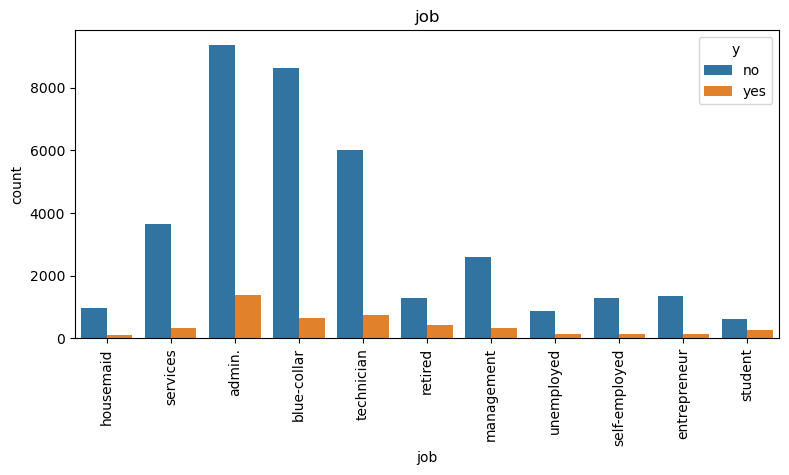

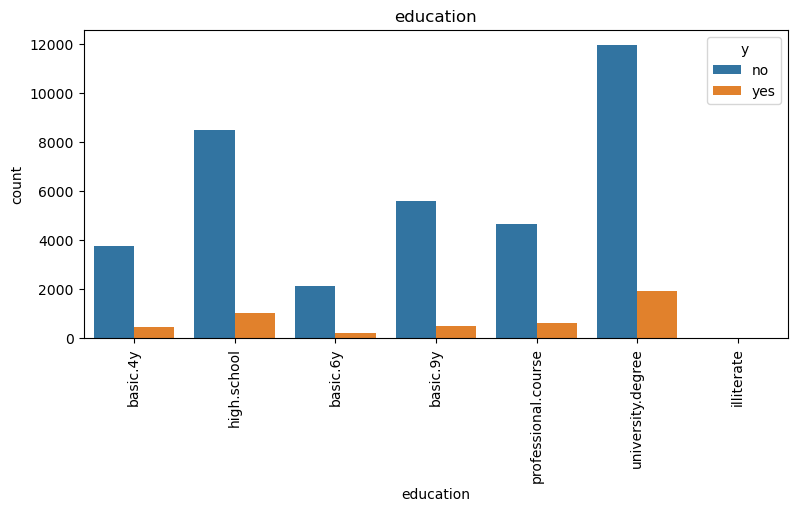

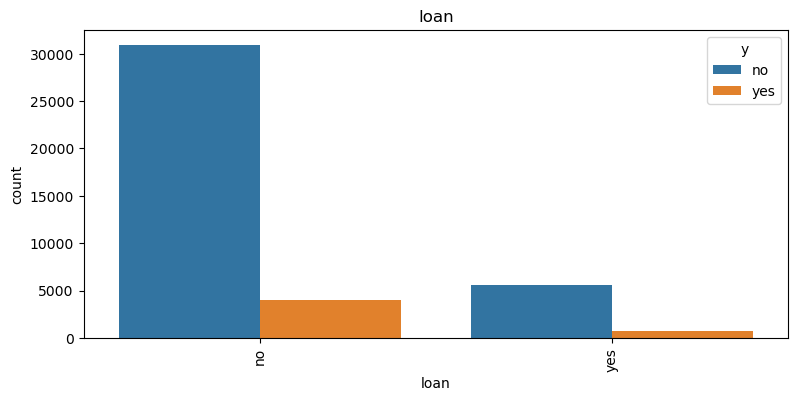

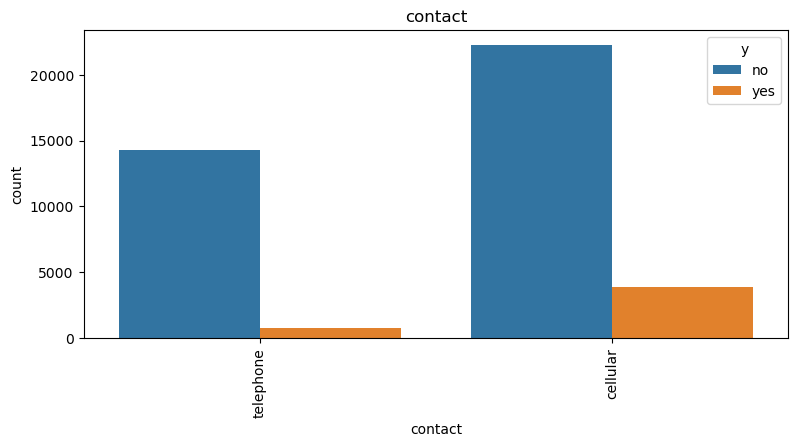

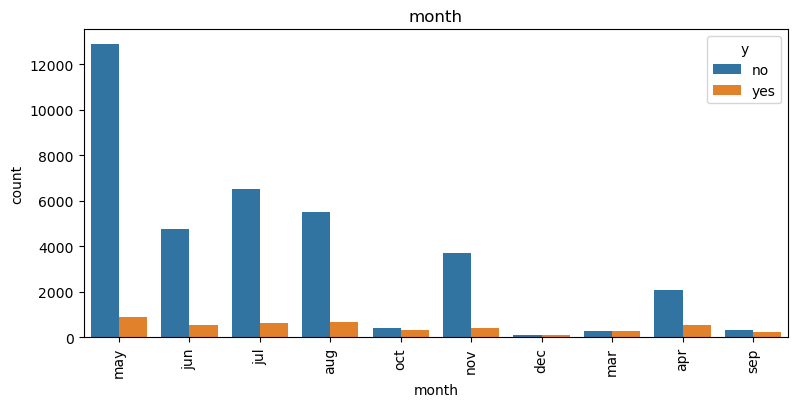

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in cat_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=df[column],hue=df['y'],data=df)
    plt.title(column)    
    plt.xticks(rotation=90)

In [21]:
numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

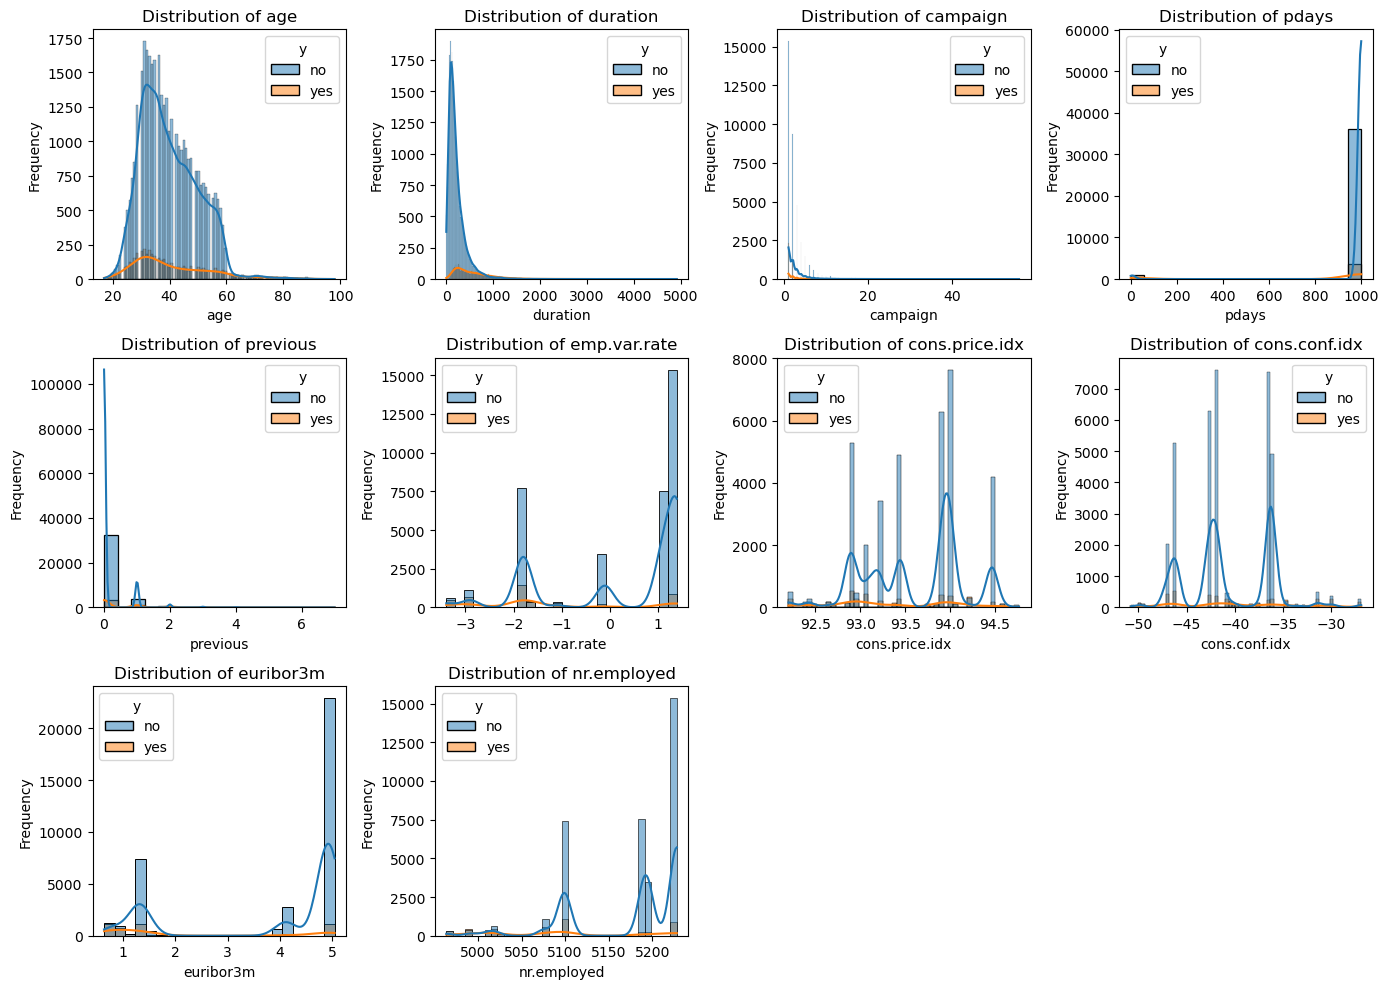

In [22]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=df, x=feature, hue='y', kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# Define a function to remove outliers based on IQR
# Remove outliers
# Create box plots for cleaned data

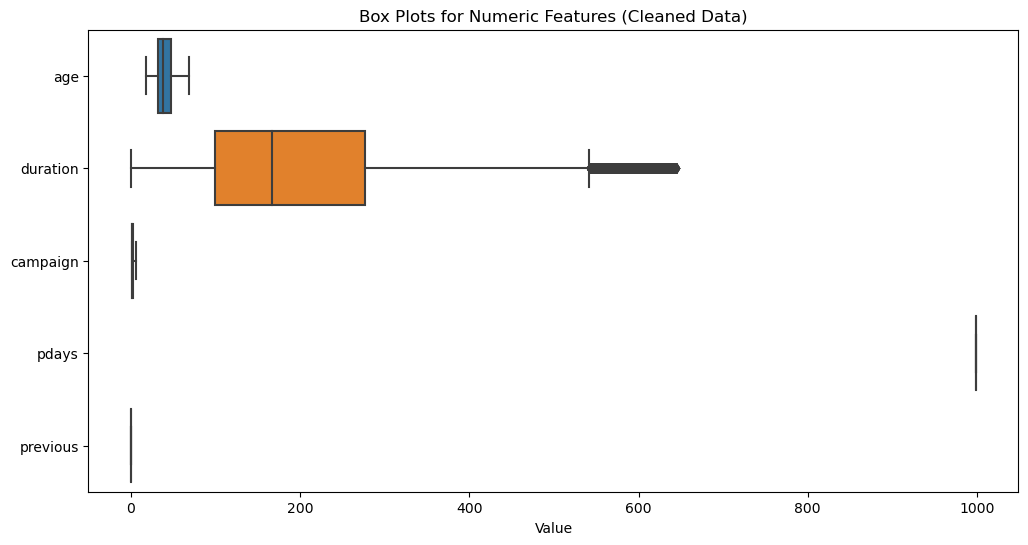

In [24]:
data = df

Q1 = data[numeric_features].quantile(0.25)
Q3 = data[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Define a function to remove outliers based on IQR
def remove_outliers(df, cols):
    for col in cols:
        lower_bound = Q1[col] - 1.5 * IQR[col]
        upper_bound = Q3[col] + 1.5 * IQR[col]
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers
data_cleaned = remove_outliers(data, numeric_features)

# Create box plots for cleaned data
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned[['age', 'duration', 'campaign', 'pdays', 'previous']], orient='h')
plt.title('Box Plots for Numeric Features (Cleaned Data)')
plt.xlabel('Value')
plt.show()

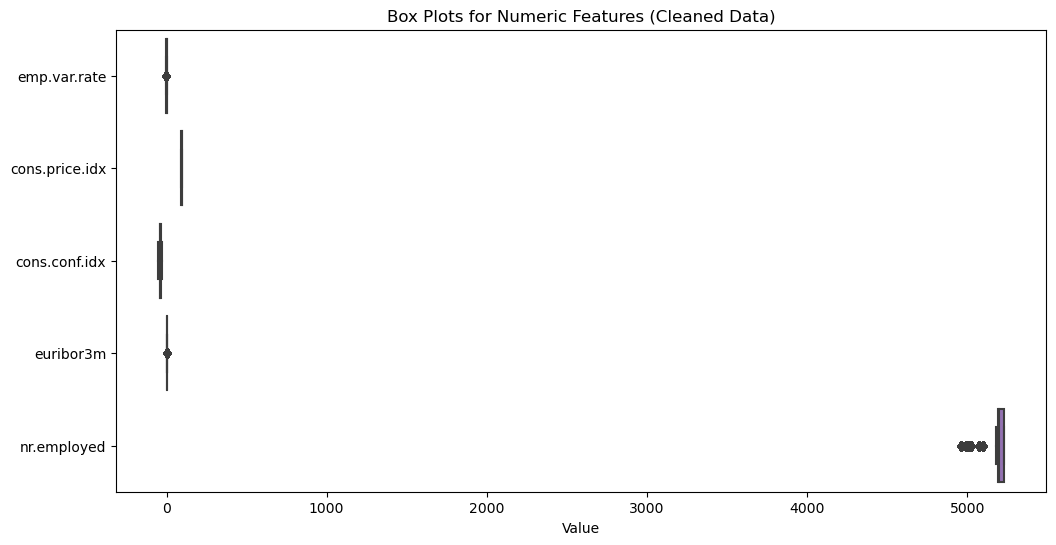

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']], orient='h')
plt.title('Box Plots for Numeric Features (Cleaned Data)')
plt.xlabel('Value')
plt.show()

## Correlation Matrix

Heat Map Method to determine correlation between the continuous variables.
There was a strong positive relationship between emp.var.rateand euribor3m with correlation 97%.
The emp.var.rate attribute also had a strong positive correlation with nr.employed at 0.91 and with cons.price.idx at 0.78

In [26]:
nf = df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

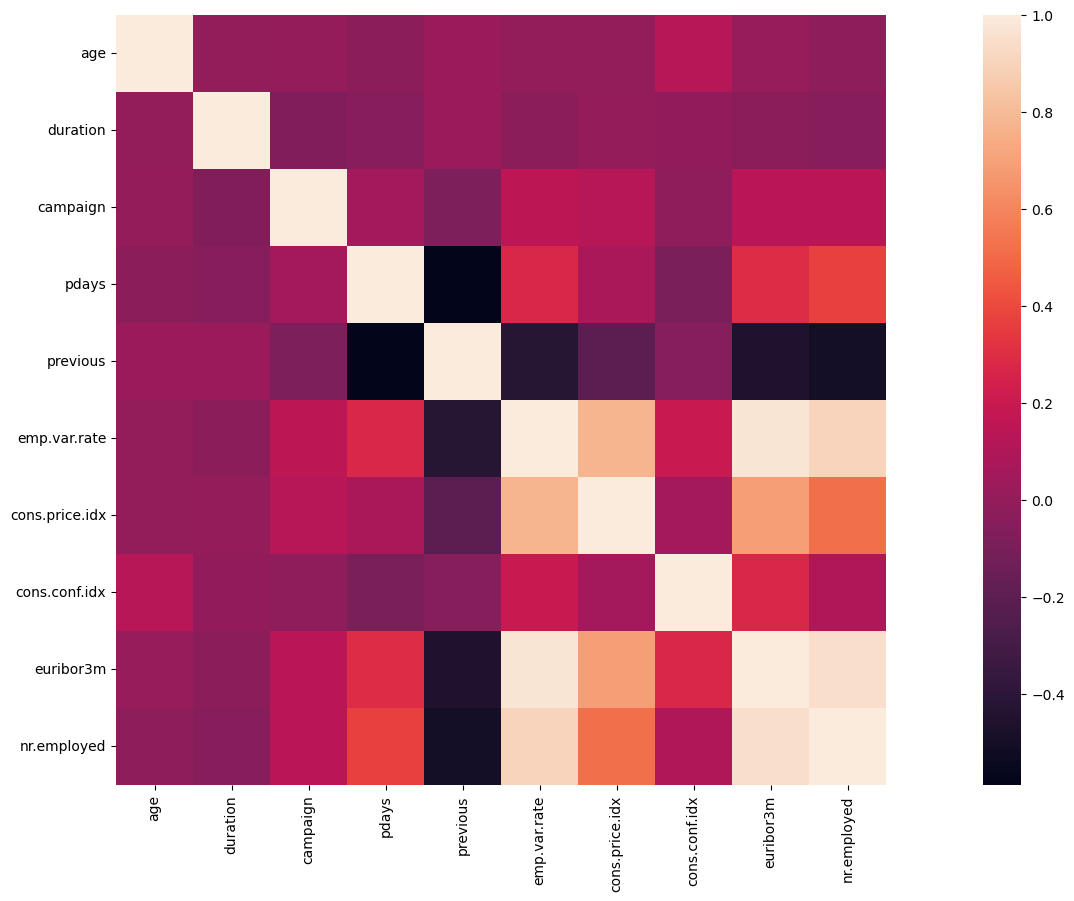

In [27]:
correlation = nf.corr(method='pearson')
plt.figure(figsize=(25,10))
sns.heatmap(correlation,vmax=1,square=True,annot=False)
plt.show()

In [34]:
from scipy.stats import chi2_contingency

In [35]:
chi2_p_values = {}
for feature in cat_col:
    contingency_table = pd.crosstab(df[feature], df['y'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_p_values[feature] = p

print("Chi-Square Test p-values for Categorical Features:")
print(chi2_p_values)

Chi-Square Test p-values for Categorical Features:
{'job': 6.808199923441661e-200, 'education': 8.692046071480118e-39, 'loan': 0.37633537946635287, 'contact': 1.5259856523129964e-189, 'month': 0.0}


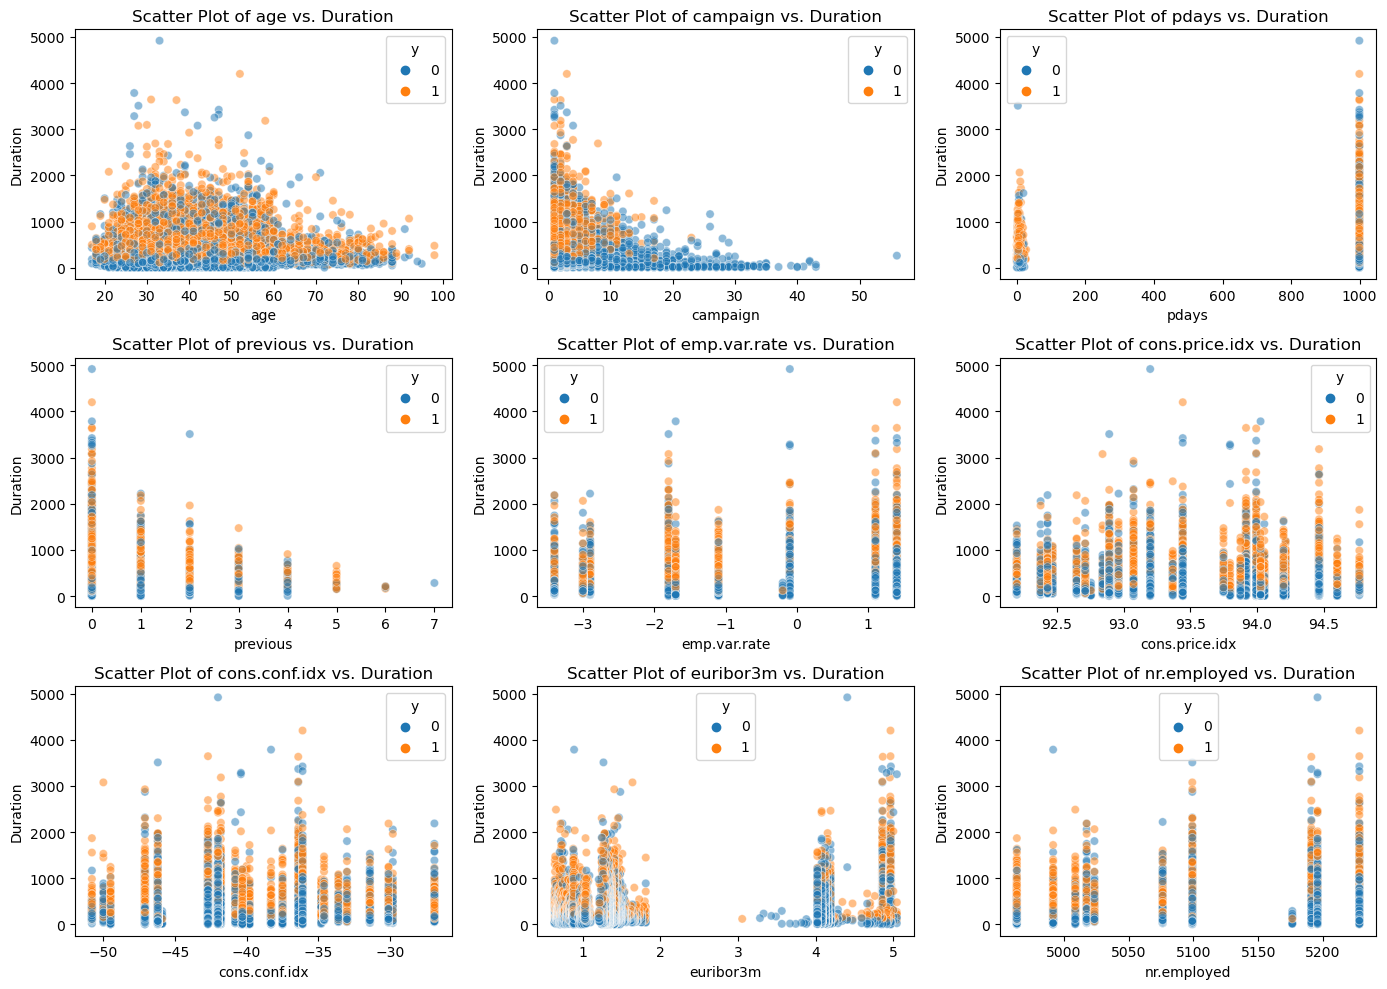

In [41]:
numeric_columns = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Creating scatter plots
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=col, y='duration', hue='y', alpha=0.5)
    plt.title(f'Scatter Plot of {col} vs. Duration')
    plt.xlabel(col)
    plt.ylabel('Duration')
plt.tight_layout()
plt.show()

## label encoding

In [7]:
from sklearn import preprocessing  

# Initializing Label Encoder
le = preprocessing.LabelEncoder()

# Iterating through each of the categorical columns and label encoding them
for feature in object_cols:
    data[feature] = le.fit_transform(data[feature])
    print(feature,data[feature].unique())
data

job [ 3  7  0  1  9  5  4 10  6  2  8]
marital [1 2 0]
education [0 3 1 2 5 6 4]
default [0 1]
housing [0 1]
loan [0 1]
contact [1 0]
month [6 4 3 1 8 7 2 5 0 9]
day_of_week [1 3 4 2 0]
poutcome [1 0 2]
y [0 1]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,1,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


## imbalanced data handling

In [8]:
#checking the percentage per output class
class_values = (data['y'].value_counts()/data['y'].value_counts().sum())*100
print(class_values)

0    88.734583
1    11.265417
Name: y, dtype: float64


In [9]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [10]:
#splitting the data into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply random under-sampling for the majority class
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Apply random over-sampling for the minority class
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)



In [12]:
#checking the percentage per output class
train=pd.DataFrame(y_train_resampled)
class_values = (train.value_counts()/train.value_counts().sum())*100
print(class_values)

0    50.0
1    50.0
dtype: float64


# Modelling

## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
# run Logistic Regression model
model1 = LogisticRegression()
# fitting the model
model1.fit(X_train, y_train)
# predicting the values
y_scores1 = model1.predict(X_test)

print('Classification Report:')
print(classification_report(y_test,y_scores1))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.41      0.51       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



C:\Users\Shruthi Mohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()

model2.fit(X_train, y_train)
y_scores2 = model2.predict(X_test)
print('Classification Report:')
print(classification_report(y_test,y_scores2))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.53      0.58       935

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.77      8238
weighted avg       0.91      0.91      0.91      8238



## Adaboost Classifier

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_scores3 = ada.predict(X_test)
print('Classification Report:')
print(classification_report(y_test,y_scores3))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.66      0.39      0.49       935

    accuracy                           0.91      8238
   macro avg       0.79      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238



## Choice of Evaluation Metric -ROC/AUC

ROC_AUC_SCORE is 0.6936141546108441


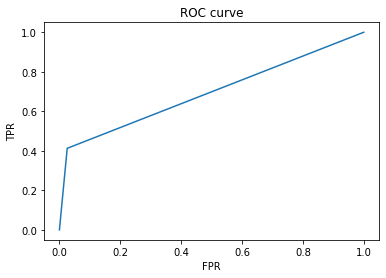

In [20]:
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
auc = roc_auc_score(y_test, y_scores1)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores1)
print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_scores1))
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

ROC_AUC_SCORE is 0.7446160503961087


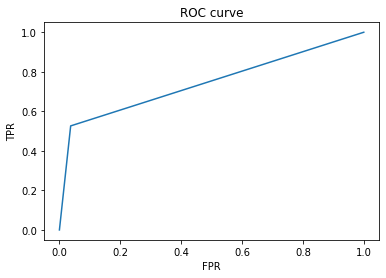

In [21]:
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
auc = roc_auc_score(y_test, y_scores2)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores2)
print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_scores2))
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

ROC_AUC_SCORE is 0.6811777593414471


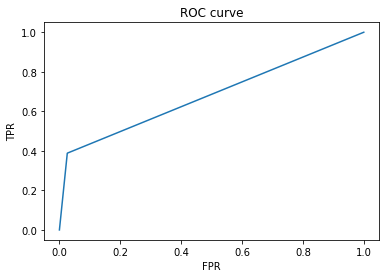

In [22]:
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
auc = roc_auc_score(y_test, y_scores3)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores3)
print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_scores3))
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Overfitting avoidance mechanism

In [26]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Standardize the data (important for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Elastic Net regularization
alpha = 1.0  # Regularization strength (adjust as needed)
l1_ratio = 0.5  # Mixing parameter, where 0 <= l1_ratio <= 1
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elastic_net.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = elastic_net.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.10061764387629847


## Model Hyperparameter Tuning

### USING GRID SEARCH FOR RANDOM FOREST (BEST ACCURACY AND ROC-AUC SCORE)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model2, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_random_forest = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)
